In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
'''First-Order Upwinding'''
# Define the parameters
nx = 100  # number of grid points
dx = 2 / (nx - 1)  # distance between two consecutive grid points
nt = 50  # number of time steps
dt = 1e-2  # time interval
c = 1.25  # constant

# Define the initial conditions
u = np.ones(nx)
u[:int(0.5 / dx)] = 2

# Define the outflow boundary conditions
def boundary_conditions(u):
    # outflow boundary condition
    u[0] = u[1]
    u[-1] = u[-2]
    return u

# Solve the equation using first-order upwinding
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    u = boundary_conditions(u)

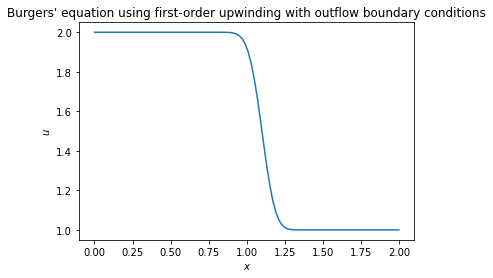

In [96]:
'''Plotting First-Order Upwinding'''
plt.plot(np.linspace(0, 2, nx), u)
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.title(f"Burgers' equation using first-order upwinding with outflow boundary conditions")
plt.show()

In [97]:
# Find the position of the shock at each time step
shock_pos = []
for i in range(nx-1):
    if u[i+1] < u[i]:
        shock_pos.append(i+0.5)
print(f'Shock positions: {shock_pos}')

# Calculate the speed of the shock
shock_speed = []
for i in range(len(shock_pos)-1):
    shock_speed.append((shock_pos[i+1] - shock_pos[i]) / dt)
print(f'Shock speeds: {shock_speed}')

Shock positions: [27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5]
Shock speeds: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [101]:
'''Conservative Formulation'''
# Define the parameters
nx = 100  # number of grid points
dx = 2 / (nx - 1)  # distance between two consecutive grid points
nt = 50  # number of time steps
dt = 1e-2  # time interval
c = 1.25  # constant

# Define the initial conditions
u = np.ones(nx)
u[:int(0.5 / dx)] = 2

# Define the outflow boundary conditions
def boundary_conditions(u):
    u[0] = u[1]
    u[-1] = u[-2]
    return u

# Define the flux function
def flux(u):
    return 0.5 * u**2

# Solve the equation
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - dt / dx * (flux(un[i]) - flux(un[i-1]))
    u = boundary_conditions(u)

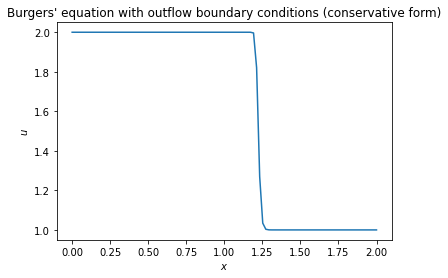

In [99]:
'''Plotting Conservative Formulation'''
plt.plot(np.linspace(0, 2, nx), u)
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.title(f"Burgers' equation with outflow boundary conditions (conservative form)")
plt.show()

In [100]:
# Find the position of the shock at each time step
shock_pos = []
for i in range(nx-1):
    if u[i+1] < u[i]:
        shock_pos.append(i+0.5)
print(f'Shock positions: {shock_pos}')

# Calculate the speed of the shock
shock_speed = []
for i in range(len(shock_pos)-1):
    shock_speed.append((shock_pos[i+1] - shock_pos[i]) / dt)
print(f'Shock speeds: {shock_speed}')

Shock positions: [53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5]
Shock speeds: [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
